In [1]:
import pandas as pd
import numpy as np
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from tqdm import tqdm_notebook as tqdm
import _pickle as pickle
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
%matplotlib inline


In [2]:
df = pd.read_csv("/Users/rohitkumar/Applications/dplr.csv", parse_dates=["TIME"],index_col="TIME")

print(df.head())

                     STATION.ID         LAST.UPDATED           NAME  \
TIME                                                                  
2019-01-01 00:00:00           1  2018-12-31 23:50:05  CLARENDON ROW   
2019-01-01 01:00:00           1  2019-01-01 00:53:10  CLARENDON ROW   
2019-01-01 02:00:00           1  2019-01-01 01:54:04  CLARENDON ROW   
2019-01-01 03:00:00           1  2019-01-01 02:55:38  CLARENDON ROW   
2019-01-01 04:00:00           1  2019-01-01 03:56:32  CLARENDON ROW   

                     BIKE.STANDS  AVAILABLE.BIKE.STANDS  AVAILABLE.BIKES  \
TIME                                                                       
2019-01-01 00:00:00           31                     30                1   
2019-01-01 01:00:00           31                     30                1   
2019-01-01 02:00:00           31                     30                1   
2019-01-01 03:00:00           31                     30                1   
2019-01-01 04:00:00           31              

In [3]:
df.index

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2019-05-03 20:00:00', '2019-05-03 21:00:00',
               '2019-05-03 22:00:00', '2019-05-02 23:00:00',
               '2019-05-03 00:00:00', '2019-05-03 01:00:00',
               '2019-05-03 02:00:00', '2019-05-03 03:00:00',
               '2019-05-03 04:00:00', '2019-05-03 05:00:00'],
              dtype='datetime64[ns]', name='TIME', length=329999, freq=None)

In [4]:
df.columns = [col.replace(".","_") for col in df]
df.head()

,STATION_ID,LAST_UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,...,ind_3,wdsp,ind_4,wddir,ww,w,sun,vis,clht,clamt
TIME,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,1,2018-12-31 23:50:05,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501,...,2.0,9.0,2.0,250.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01 01:00:00,1,2019-01-01 00:53:10,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501,...,2.0,9.0,2.0,250.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01 02:00:00,1,2019-01-01 01:54:04,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501,...,2.0,8.0,2.0,240.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01 03:00:00,1,2019-01-01 02:55:38,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501,...,2.0,8.0,2.0,250.0,2.0,11.0,0.0,30000.0,30.0,6.0
2019-01-01 04:00:00,1,2019-01-01 03:56:32,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501,...,2.0,10.0,2.0,250.0,2.0,11.0,0.0,30000.0,24.0,6.0


In [5]:
df.columns = [col.replace(".","_") for col in df]
df.head()

,STATION_ID,LAST_UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,...,ind_3,wdsp,ind_4,wddir,ww,w,sun,vis,clht,clamt
TIME,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,1,2018-12-31 23:50:05,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501,...,2.0,9.0,2.0,250.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01 01:00:00,1,2019-01-01 00:53:10,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501,...,2.0,9.0,2.0,250.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01 02:00:00,1,2019-01-01 01:54:04,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501,...,2.0,8.0,2.0,240.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01 03:00:00,1,2019-01-01 02:55:38,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501,...,2.0,8.0,2.0,250.0,2.0,11.0,0.0,30000.0,30.0,6.0
2019-01-01 04:00:00,1,2019-01-01 03:56:32,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501,...,2.0,10.0,2.0,250.0,2.0,11.0,0.0,30000.0,24.0,6.0


In [6]:
df["2019-01-01"]

,STATION_ID,LAST_UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,...,ind_3,wdsp,ind_4,wddir,ww,w,sun,vis,clht,clamt
TIME,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,1,2018-12-31 23:50:05,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501,...,2.0,9.0,2.0,250.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01 01:00:00,1,2019-01-01 00:53:10,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501,...,2.0,9.0,2.0,250.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01 02:00:00,1,2019-01-01 01:54:04,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501,...,2.0,8.0,2.0,240.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01 03:00:00,1,2019-01-01 02:55:38,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501,...,2.0,8.0,2.0,250.0,2.0,11.0,0.0,30000.0,30.0,6.0
2019-01-01 04:00:00,1,2019-01-01 03:56:32,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501,...,2.0,10.0,2.0,250.0,2.0,11.0,0.0,30000.0,24.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01 19:00:00,115,2019-01-01 18:58:58,KILLARNEY STREET,30,24,6,Open,Killarney Street,53.354843,-6.247579,...,2.0,5.0,2.0,20.0,2.0,11.0,0.0,18000.0,27.0,8.0
2019-01-01 20:00:00,115,2019-01-01 19:56:56,KILLARNEY STREET,30,21,9,Open,Killarney Street,53.354843,-6.247579,...,2.0,5.0,2.0,360.0,2.0,11.0,0.0,18000.0,27.0,8.0
2019-01-01 21:00:00,115,2019-01-01 20:56:18,KILLARNEY STREET,30,23,7,Open,Killarney Street,53.354843,-6.247579,...,2.0,5.0,2.0,10.0,2.0,11.0,0.0,18000.0,28.0,5.0


In [7]:
df.AVAILABLE_BIKES.resample('W').mean()

TIME
2019-01-06    11.162707
2019-01-13    11.239206
2019-01-20    11.231516
2019-01-27    11.233020
2019-02-03    11.314054
2019-02-10    11.169827
2019-02-17    10.908590
2019-02-24    10.698957
2019-03-03    10.776075
2019-03-10    10.828365
2019-03-17    10.824747
2019-03-24    11.081016
2019-03-31    10.968477
2019-04-07    10.922619
2019-04-14    10.707385
2019-04-21    11.080015
2019-04-28    11.379319
2019-05-05    10.944807
Freq: W-SUN, Name: AVAILABLE_BIKES, dtype: float64

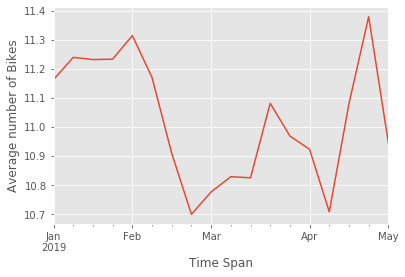

In [11]:
%matplotlib inline
df.AVAILABLE_BIKES.resample('W').mean().plot()
plt.xlabel('Time Span')
plt.ylabel('Average number of Bikes')
plt.show()

In [9]:
df.AVAILABLE_BIKES.resample('M').mean()

TIME
2019-01-31    11.209273
2019-02-28    10.939860
2019-03-31    10.940882
2019-04-30    11.028208
2019-05-31    10.793004
Freq: M, Name: AVAILABLE_BIKES, dtype: float64

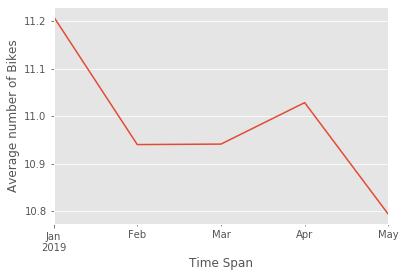

In [12]:
%matplotlib inline
df.AVAILABLE_BIKES.resample('M').mean().plot()
plt.xlabel('Time Span')
plt.ylabel('Average number of Bikes')
plt.show()

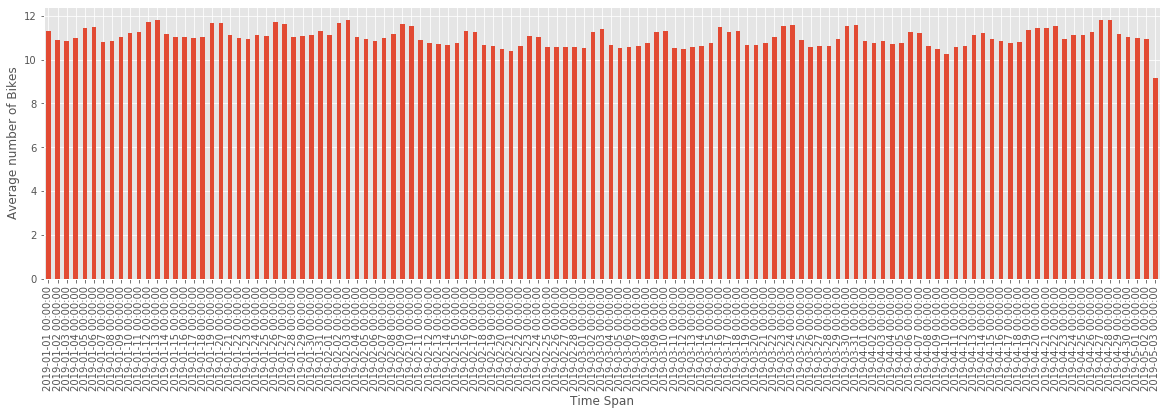

In [14]:
df.AVAILABLE_BIKES.resample('D').mean().plot(kind='bar',figsize=(20,5))
plt.xlabel('Time Span')
plt.ylabel('Average number of Bikes')
plt.show()

In [67]:
Week1 = pd.date_range(start="2019-01-01",end="2019/01/06",freq='D')
Week1
Week2 = pd.date_range(start="2019-01-07",end="2019/01/13",freq='D')
Week2
Week3 = pd.date_range(start="2019-01-14",end="2019/01/20",freq='D')
Week3
Week4 = pd.date_range(start="2019-01-21",end="2019/01/27",freq='D')
Week4
Week5 = pd.date_range(start="2019-01-28",end="2019/02/03",freq='D')
Week5
rng = pd.date_range(start="2019-01-01",end="2019/02/28",freq='D')
rng
ro = pd.date_range(start="2019-01-01",end="2019/04/30",freq='D')
ro

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-04-21', '2019-04-22', '2019-04-23', '2019-04-24',
               '2019-04-25', '2019-04-26', '2019-04-27', '2019-04-28',
               '2019-04-29', '2019-04-30'],
              dtype='datetime64[ns]', length=120, freq='D')

In [16]:
df.loc[Week1]

,STATION_ID,LAST_UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,...,ind_3,wdsp,ind_4,wddir,ww,w,sun,vis,clht,clamt
TIME,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1,2018-12-31 23:50:05,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501,...,2.0,9.0,2.0,250.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01,2,2018-12-31 23:55:41,BLESSINGTON STREET,20,19,1,Open,Blessington Street,53.356770,-6.268140,...,2.0,9.0,2.0,250.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01,3,2018-12-31 23:50:05,BOLTON STREET,20,13,7,Open,Bolton Street,53.351181,-6.269859,...,2.0,9.0,2.0,250.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01,4,2018-12-31 23:50:11,GREEK STREET,20,14,6,Open,Greek Street,53.346874,-6.272976,...,2.0,9.0,2.0,250.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01,5,2018-12-31 23:59:22,CHARLEMONT PLACE,40,12,28,Open,Charlemont Street,53.330662,-6.260177,...,2.0,9.0,2.0,250.0,2.0,11.0,0.0,30000.0,999.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-06,111,2019-01-05 23:56:24,MOUNTJOY SQUARE EAST,40,25,15,Open,Mountjoy Square East,53.356716,-6.256359,...,2.0,6.0,2.0,220.0,2.0,11.0,0.0,30000.0,34.0,7.0
2019-01-06,112,2019-01-05 23:58:51,NORTH CIRCULAR ROAD (O'CONNELL'S),30,11,19,Open,North Circular Road (O'Connell's),53.357841,-6.251557,...,2.0,6.0,2.0,220.0,2.0,11.0,0.0,30000.0,34.0,7.0
2019-01-06,113,2019-01-05 23:56:03,MERRION SQUARE SOUTH,40,34,6,Open,Merrion Square South,53.338615,-6.248606,...,2.0,6.0,2.0,220.0,2.0,11.0,0.0,30000.0,34.0,7.0


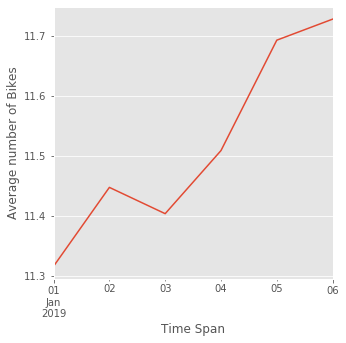

In [19]:
%matplotlib inline
df.AVAILABLE_BIKES.loc[Week1].resample('D').mean().plot(figsize=(5,5))
plt.xlabel('Time Span')
plt.ylabel('Average number of Bikes')
plt.show()

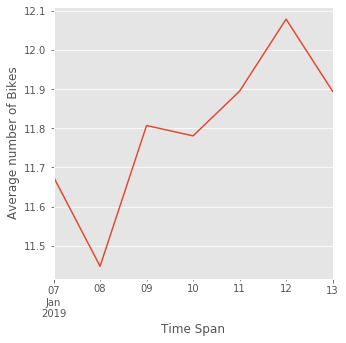

In [20]:
%matplotlib inline
df.AVAILABLE_BIKES.loc[Week2].resample('D').mean().plot(figsize=(5,5))
plt.xlabel('Time Span')
plt.ylabel('Average number of Bikes')
plt.show()

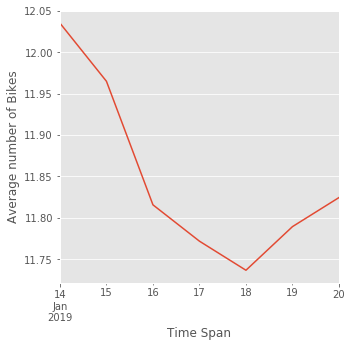

In [21]:
%matplotlib inline
df.AVAILABLE_BIKES.loc[Week3].resample('D').mean().plot(figsize=(5,5))
plt.xlabel('Time Span')
plt.ylabel('Average number of Bikes')
plt.show()

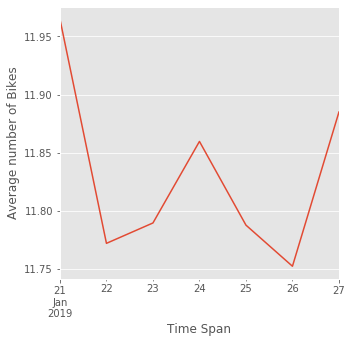

In [22]:
%matplotlib inline
df.AVAILABLE_BIKES.loc[Week4].resample('D').mean().plot(figsize=(5,5))
plt.xlabel('Time Span')
plt.ylabel('Average number of Bikes')
plt.show()

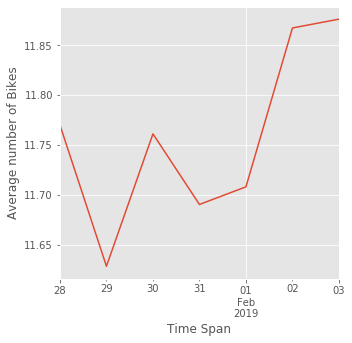

In [23]:
%matplotlib inline
df.AVAILABLE_BIKES.loc[Week5].resample('D').mean().plot(figsize=(5,5))
plt.xlabel('Time Span')
plt.ylabel('Average number of Bikes')
plt.show()

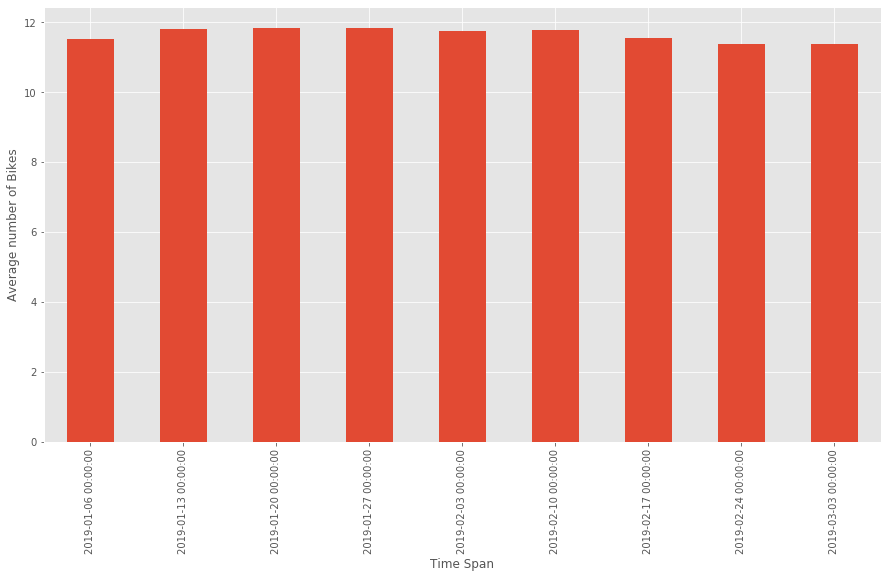

In [70]:
%matplotlib inline
df.AVAILABLE_BIKES.loc[rng].resample('W').mean().plot(kind='bar',figsize=(15,8))
plt.xlabel('Time Span')
plt.ylabel('Average number of Bikes')
plt.show()

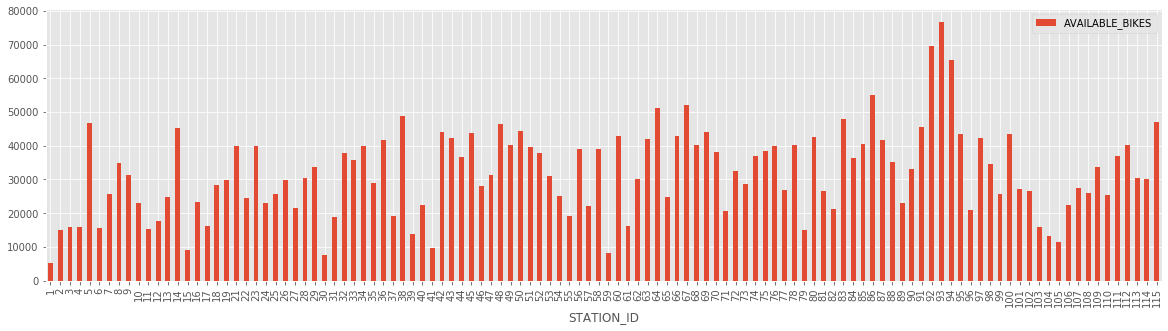

In [66]:
#Monthly Bike Availability for Jan Month
df[df.loc[rng].columns[df.columns.isin(['TIME','AVAILABLE_BIKES','STATION_ID'])]].groupby('STATION_ID').sum().plot(kind='bar',figsize=(20,5))

#df.AVAILABLE_BIKES.loc[rng].resample('W').mean().plot(kind='bar',figsize=(20,20))

#df.groupby('STATION_ID').sum()

                       STATION_ID  BIKE_STANDS  AVAILABLE_BIKE_STANDS  \
STATION_ID               1.000000     0.570849               0.271161   
BIKE_STANDS              0.570849     1.000000               0.437429   
AVAILABLE_BIKE_STANDS    0.271161     0.437429               1.000000   
AVAILABLE_BIKES          0.105216     0.215199              -0.772008   
LATITUDE                 0.228651    -0.076514              -0.017743   
LONGITUDE               -0.259166    -0.047321              -0.003293   
ind                      0.001221     0.001452              -0.005218   
rain                     0.001080     0.000249              -0.002889   
ind_1                    0.000580     0.000969              -0.005287   
temp                     0.000514    -0.002625               0.014236   
ind_2                    0.000594     0.001409              -0.006449   
wetb                     0.000568    -0.002380               0.011885   
dewpt                    0.000665    -0.001642     

In [27]:
df.dtypes

STATION_ID                 int64
LAST_UPDATED              object
NAME                      object
BIKE_STANDS                int64
AVAILABLE_BIKE_STANDS      int64
AVAILABLE_BIKES            int64
STATUS                    object
ADDRESS                   object
LATITUDE                 float64
LONGITUDE                float64
ind                      float64
rain                     float64
ind_1                    float64
temp                     float64
ind_2                    float64
wetb                     float64
dewpt                    float64
vappr                    float64
rhum                     float64
msl                      float64
ind_3                    float64
wdsp                     float64
ind_4                    float64
wddir                    float64
ww                       float64
w                        float64
sun                      float64
vis                      float64
clht                     float64
clamt                    float64
dtype: obj

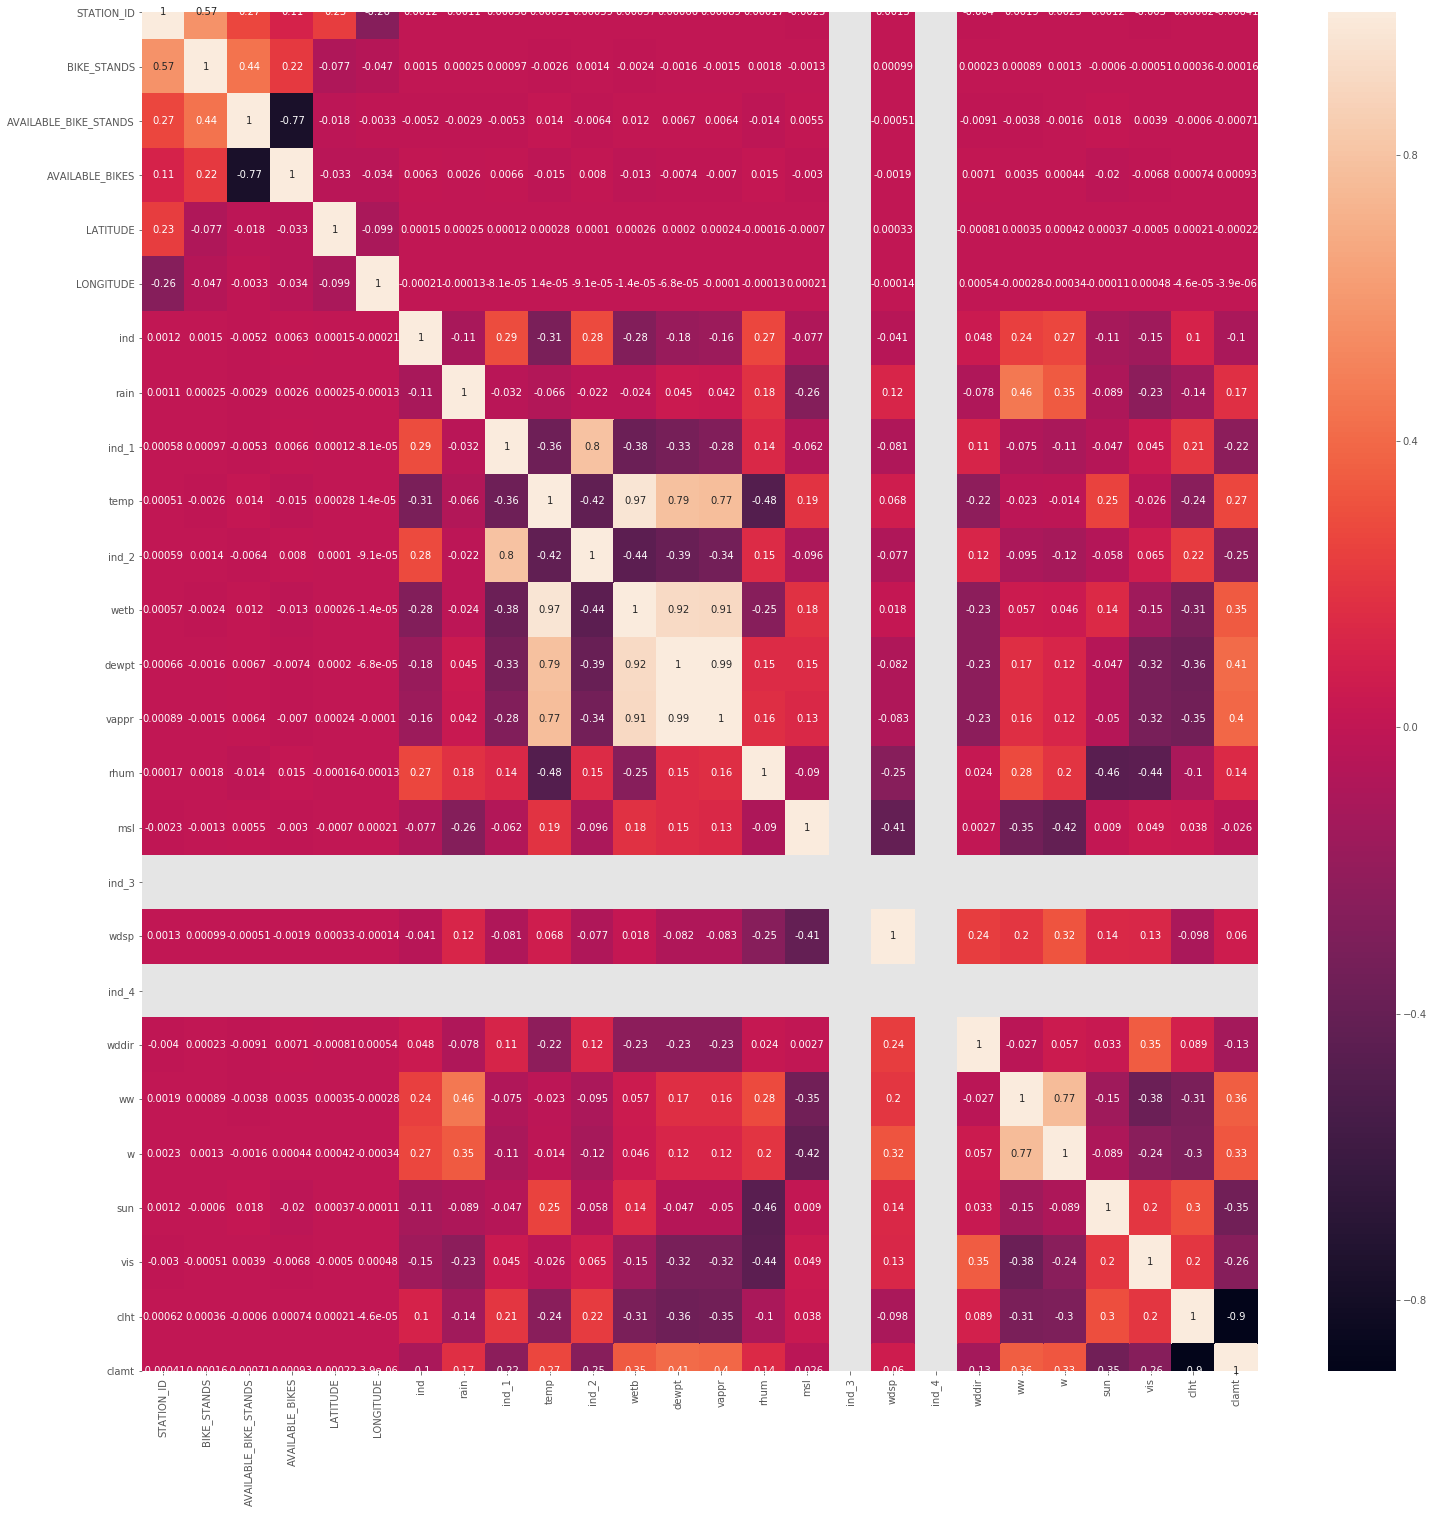

In [28]:
import seaborn as sn
import matplotlib.pyplot as plt


plt.subplots(figsize=(25,25))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [29]:
df["2019-01-01":"2019-01-31"]

,STATION_ID,LAST_UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,...,ind_3,wdsp,ind_4,wddir,ww,w,sun,vis,clht,clamt
TIME,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,1,2018-12-31 23:50:05,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501,...,2.0,9.0,2.0,250.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01 01:00:00,1,2019-01-01 00:53:10,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501,...,2.0,9.0,2.0,250.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01 02:00:00,1,2019-01-01 01:54:04,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501,...,2.0,8.0,2.0,240.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01 03:00:00,1,2019-01-01 02:55:38,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501,...,2.0,8.0,2.0,250.0,2.0,11.0,0.0,30000.0,30.0,6.0
2019-01-01 04:00:00,1,2019-01-01 03:56:32,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501,...,2.0,10.0,2.0,250.0,2.0,11.0,0.0,30000.0,24.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-31 19:00:00,115,2019-01-31 18:53:27,KILLARNEY STREET,30,12,18,Open,Killarney Street,53.354843,-6.247579,...,2.0,17.0,2.0,100.0,60.0,62.0,0.0,15000.0,17.0,8.0
2019-01-31 20:00:00,115,2019-01-31 19:54:24,KILLARNEY STREET,30,9,21,Open,Killarney Street,53.354843,-6.247579,...,2.0,17.0,2.0,100.0,60.0,62.0,0.0,15000.0,17.0,8.0
2019-01-31 21:00:00,115,2019-01-31 20:56:21,KILLARNEY STREET,30,8,22,Open,Killarney Street,53.354843,-6.247579,...,2.0,14.0,2.0,110.0,23.0,76.0,0.0,15000.0,14.0,8.0


In [30]:
corrMatrix = df.corr()
print (corrMatrix)

                       STATION_ID  BIKE_STANDS  AVAILABLE_BIKE_STANDS  \
STATION_ID               1.000000     0.570849               0.271161   
BIKE_STANDS              0.570849     1.000000               0.437429   
AVAILABLE_BIKE_STANDS    0.271161     0.437429               1.000000   
AVAILABLE_BIKES          0.105216     0.215199              -0.772008   
LATITUDE                 0.228651    -0.076514              -0.017743   
LONGITUDE               -0.259166    -0.047321              -0.003293   
ind                      0.001221     0.001452              -0.005218   
rain                     0.001080     0.000249              -0.002889   
ind_1                    0.000580     0.000969              -0.005287   
temp                     0.000514    -0.002625               0.014236   
ind_2                    0.000594     0.001409              -0.006449   
wetb                     0.000568    -0.002380               0.011885   
dewpt                    0.000665    -0.001642     

In [31]:
df.dtypes

STATION_ID                 int64
LAST_UPDATED              object
NAME                      object
BIKE_STANDS                int64
AVAILABLE_BIKE_STANDS      int64
AVAILABLE_BIKES            int64
STATUS                    object
ADDRESS                   object
LATITUDE                 float64
LONGITUDE                float64
ind                      float64
rain                     float64
ind_1                    float64
temp                     float64
ind_2                    float64
wetb                     float64
dewpt                    float64
vappr                    float64
rhum                     float64
msl                      float64
ind_3                    float64
wdsp                     float64
ind_4                    float64
wddir                    float64
ww                       float64
w                        float64
sun                      float64
vis                      float64
clht                     float64
clamt                    float64
dtype: obj

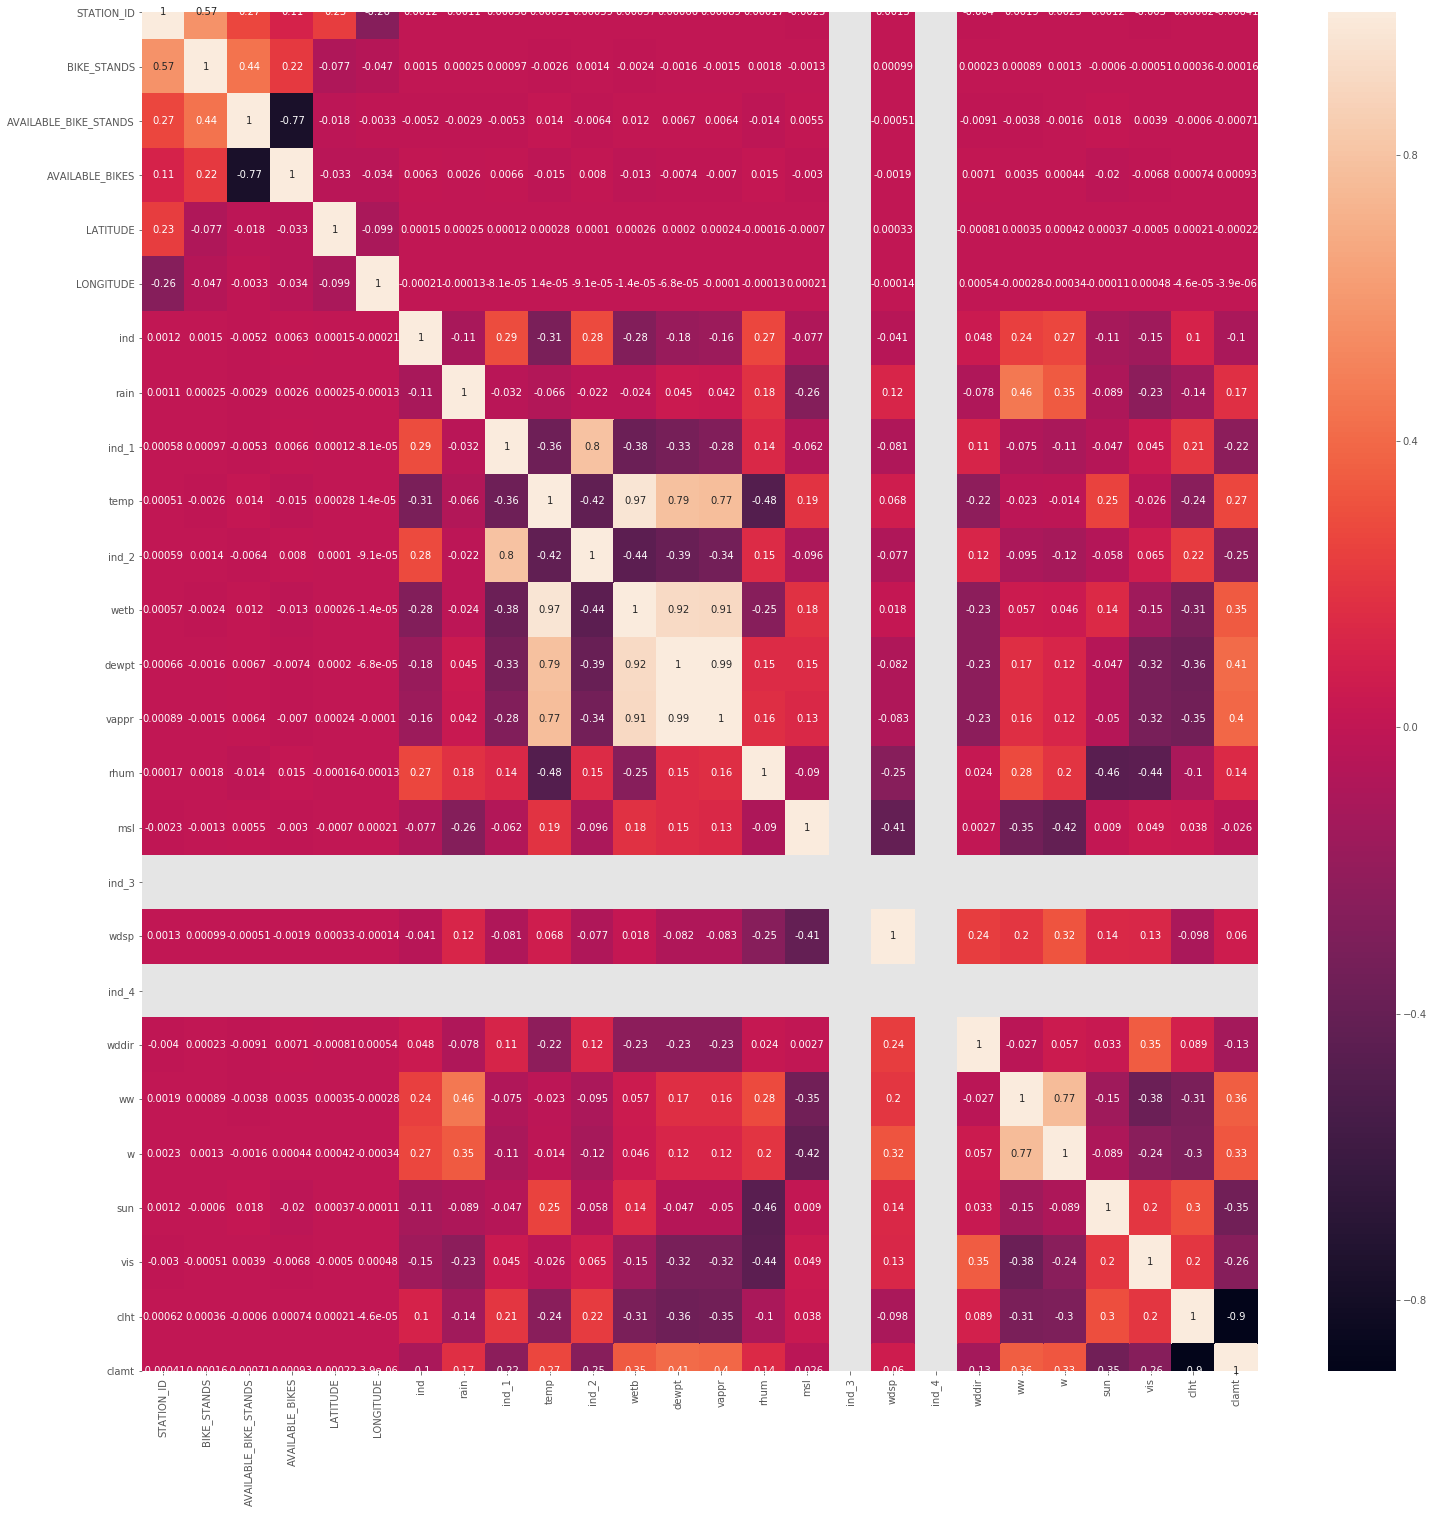

In [35]:
import seaborn as sn
import matplotlib.pyplot as plt


plt.subplots(figsize=(25,25))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [36]:
df1=df[df.columns[~df.columns.isin(['LAST_UPDATED','NAME','STATUS','ADDRESS','LATITUDE','LONGITUDE'])]]

In [37]:
df1["2019-01-01"]

,STATION_ID,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,ind,rain,ind_1,temp,ind_2,wetb,...,ind_3,wdsp,ind_4,wddir,ww,w,sun,vis,clht,clamt
TIME,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,1,31,30,1,0.0,0.0,0.0,8.8,0.0,7.3,...,2.0,9.0,2.0,250.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01 01:00:00,1,31,30,1,0.0,0.0,0.0,8.3,0.0,7.0,...,2.0,9.0,2.0,250.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01 02:00:00,1,31,30,1,0.0,0.0,0.0,8.4,0.0,7.1,...,2.0,8.0,2.0,240.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01 03:00:00,1,31,30,1,0.0,0.0,0.0,8.6,0.0,7.3,...,2.0,8.0,2.0,250.0,2.0,11.0,0.0,30000.0,30.0,6.0
2019-01-01 04:00:00,1,31,30,1,0.0,0.0,0.0,8.4,0.0,7.3,...,2.0,10.0,2.0,250.0,2.0,11.0,0.0,30000.0,24.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01 19:00:00,115,30,24,6,0.0,0.0,0.0,5.6,0.0,4.6,...,2.0,5.0,2.0,20.0,2.0,11.0,0.0,18000.0,27.0,8.0
2019-01-01 20:00:00,115,30,21,9,0.0,0.0,0.0,4.6,0.0,3.7,...,2.0,5.0,2.0,360.0,2.0,11.0,0.0,18000.0,27.0,8.0
2019-01-01 21:00:00,115,30,23,7,0.0,0.0,0.0,3.3,0.0,2.4,...,2.0,5.0,2.0,10.0,2.0,11.0,0.0,18000.0,28.0,5.0


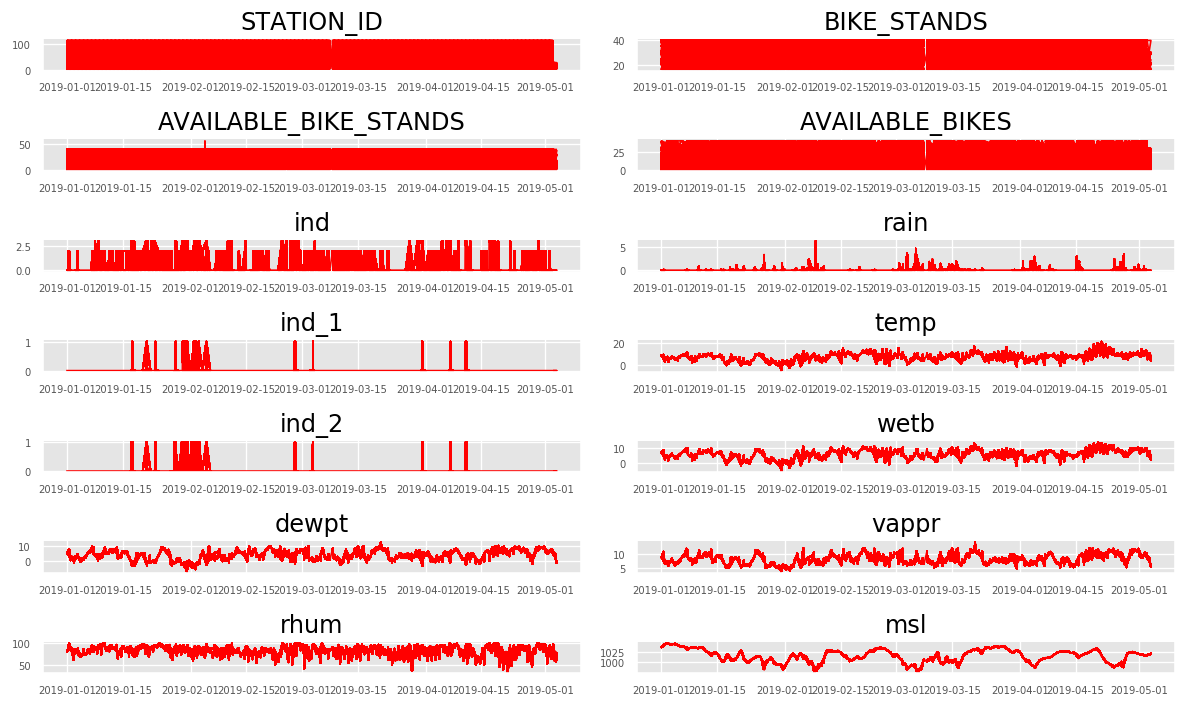

In [38]:
# Plot of all the variables present in the dataFrame

fig, axes = plt.subplots(nrows=7, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df1[df1.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df1.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [40]:
#df3=df1["2019-01-01":"2019-03-15"]
df3 = df1[df1['STATION_ID']==3]
df3

,STATION_ID,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,ind,rain,ind_1,temp,ind_2,wetb,...,ind_3,wdsp,ind_4,wddir,ww,w,sun,vis,clht,clamt
TIME,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,3,20,13,7,0.0,0.0,0.0,8.8,0.0,7.3,...,2.0,9.0,2.0,250.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01 01:00:00,3,20,13,7,0.0,0.0,0.0,8.3,0.0,7.0,...,2.0,9.0,2.0,250.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01 02:00:00,3,20,13,7,0.0,0.0,0.0,8.4,0.0,7.1,...,2.0,8.0,2.0,240.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01 03:00:00,3,20,13,7,0.0,0.0,0.0,8.6,0.0,7.3,...,2.0,8.0,2.0,250.0,2.0,11.0,0.0,30000.0,30.0,6.0
2019-01-01 04:00:00,3,20,13,7,0.0,0.0,0.0,8.4,0.0,7.3,...,2.0,10.0,2.0,250.0,2.0,11.0,0.0,30000.0,24.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-03 18:00:00,3,20,17,3,0.0,0.0,0.0,9.0,0.0,5.7,...,2.0,11.0,2.0,10.0,2.0,11.0,0.1,40000.0,40.0,7.0
2019-05-03 19:00:00,3,20,19,1,0.0,0.0,0.0,7.7,0.0,4.9,...,2.0,12.0,2.0,350.0,2.0,11.0,0.4,40000.0,999.0,3.0
2019-05-03 20:00:00,3,20,17,3,0.0,0.0,0.0,6.7,0.0,4.1,...,2.0,11.0,2.0,350.0,2.0,11.0,0.0,40000.0,110.0,5.0


In [41]:
df3 = df3.resample('D').mean()
df3

,STATION_ID,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,ind,rain,ind_1,temp,ind_2,wetb,...,ind_3,wdsp,ind_4,wddir,ww,w,sun,vis,clht,clamt
TIME,,,,,,,,,,,,,,,,,,,,,
2019-01-01,3.0,20.0,12.208333,7.791667,0.416667,0.008333,0.0,7.266667,0.0,6.433333,...,2.0,7.750000,2.0,187.916667,14.541667,27.916667,0.004167,19000.000000,141.875000,6.500000
2019-01-02,3.0,20.0,13.041667,6.958333,0.000000,0.000000,0.0,5.420833,0.0,4.008333,...,2.0,4.208333,2.0,175.416667,2.583333,11.458333,0.000000,26125.000000,30.625000,7.000000
2019-01-03,3.0,20.0,16.666667,3.333333,0.083333,0.000000,0.0,6.283333,0.0,5.000000,...,2.0,3.958333,2.0,168.750000,2.791667,15.250000,0.000000,26666.666667,31.208333,7.750000
2019-01-04,3.0,20.0,17.708333,2.291667,0.000000,0.000000,0.0,5.529167,0.0,3.720833,...,2.0,4.791667,2.0,182.083333,2.000000,11.000000,0.000000,30416.666667,26.916667,7.333333
2019-01-05,3.0,20.0,14.333333,5.625000,0.000000,0.000000,0.0,6.425000,0.0,4.804167,...,2.0,5.125000,2.0,200.833333,2.000000,11.000000,0.045833,32708.333333,34.625000,6.791667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-29,3.0,20.0,15.875000,4.125000,1.041667,0.050000,0.0,9.820833,0.0,9.375000,...,2.0,8.791667,2.0,134.166667,27.791667,38.916667,0.000000,8220.833333,7.250000,7.916667
2019-04-30,3.0,20.0,14.833333,5.166667,0.250000,0.091667,0.0,10.429167,0.0,9.641667,...,2.0,7.625000,2.0,145.000000,24.958333,46.208333,0.004167,17708.333333,32.125000,7.208333
2019-05-01,3.0,20.0,15.541667,4.458333,0.083333,0.008333,0.0,10.245833,0.0,8.183333,...,2.0,8.166667,2.0,266.250000,6.208333,20.416667,0.291667,40416.666667,277.958333,5.208333


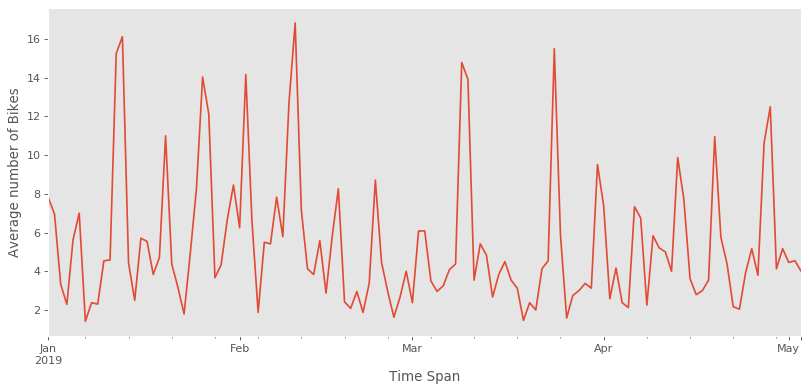

In [42]:
#Graph to verify if the data is stationary

from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
df3['AVAILABLE_BIKES'].plot()
plt.tight_layout()
plt.grid()
plt.xlabel('Time Span')
plt.ylabel('Average number of Bikes')
plt.show()
plt.show()

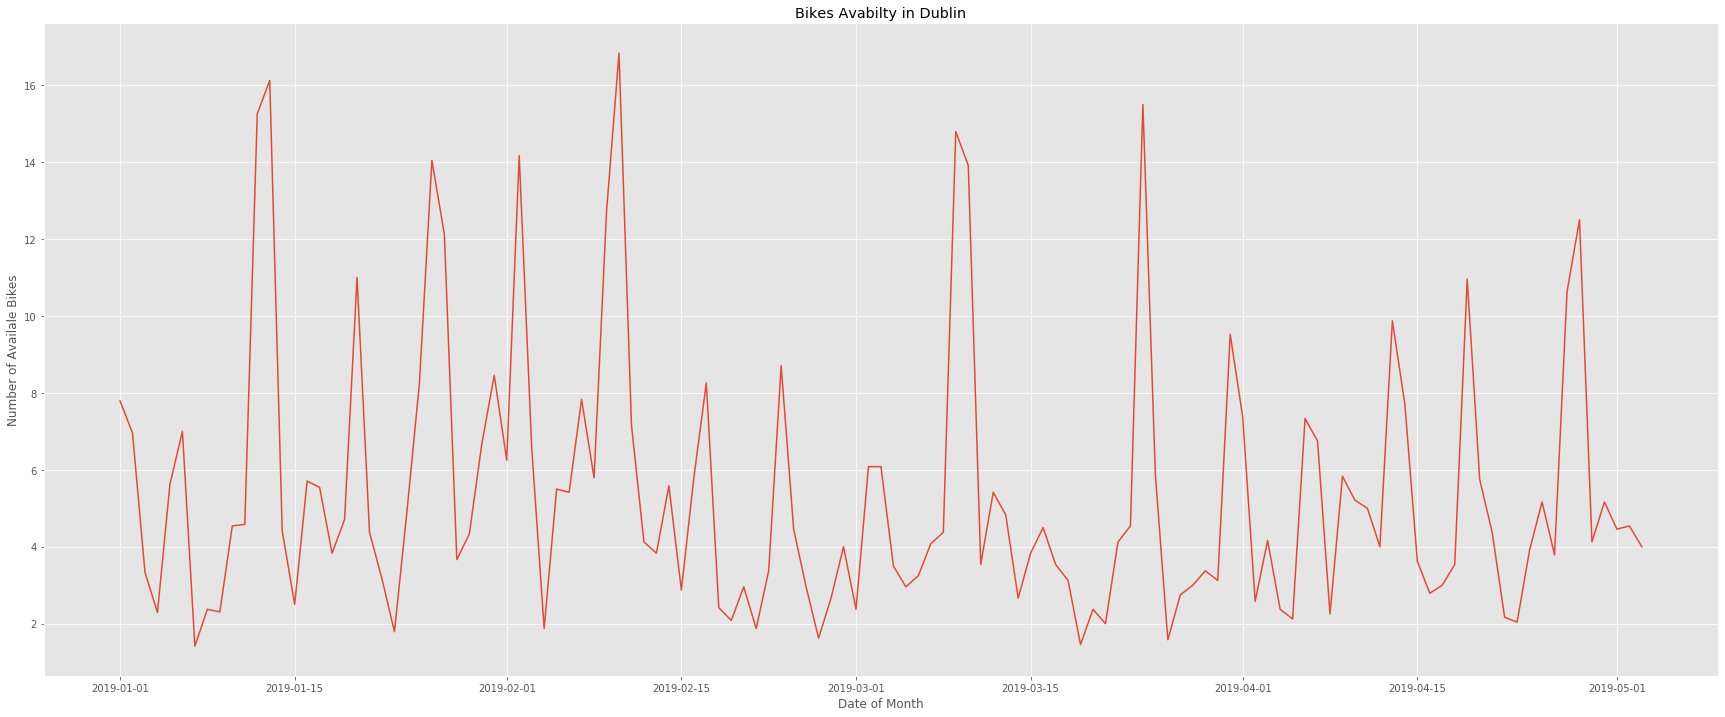

In [43]:
plt.figure(figsize=(30,12))
plt.plot(df3.AVAILABLE_BIKES)
plt.title('Bikes Avabilty in Dublin')
plt.ylabel('Number of Availale Bikes')
plt.xlabel('Date of Month')
plt.grid(True)
plt.show()

In [45]:
# Stationarity check and Seasonal decomposition
#seasonal_decompose(btc_month.close, freq=12).plot()
seasonal_decompose(df3.AVAILABLE_BIKES, freq = 4 ).plot()
print("Dickey–Fuller test: p=%f" % adfuller(df3.AVAILABLE_BIKES)[1])
plt.show()

NameError: name 'seasonal_decompose' is not defined